# 1. Retrieving and Preparing the Heart Failure Data-set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz

In [2]:
heartFailure=pd.read_csv("heart_failure_clinical_records_dataset.csv")
heartFailure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heartFailure.shape

(299, 13)

In [4]:
heartFailure.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Data Description:

Ejection_fraction = Ejection fraction (EF) is a measurement, expressed as a percentage,
                     of how much blood the left ventricle pumps out with each contraction. 

anaemia: decrease of red blood cells or hemoglobin (boolean)
high blood pressure: if the patient has hypertension (boolean)
 
creatinine_phosphokinase =  an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle.
                            The CPK normal range for a male is between 39 – 308 U/L, 
                            while in females the CPK normal range is between 26 – 192 U/L.
 
Platelets = The cells that circulate within our blood and bind together when they recognize damaged blood vessels.
             A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood.

serum_creatinine = An increased level of creatinine may be a sign of poor kidney function.
                    The typical range for serum creatinine is: For adult men, 0.74 to 1.35 mg/dL 
                    For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)

serum_sodium = A measurement in assessing electrolyte, acid-base, and water balance, as well as renal function.
               The reference range for serum sodium is 135-147 mmol/L.\
sex: woman[0] or man[1] (binary)\
smoking: if the patient smokes or not (boolean)\
time: follow-up period (days)\
[target] death event: if the patient deceased during the follow-up period (boolean)

## Data Preparation

In [5]:
# Searching null values
heartFailure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
heartFailure.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
# Searching in appropriate values
heartFailure.describe().loc[['count','max','min']]

# So, all data of anemia, diabetes, high_blood_pressure,sex,smoking death_event are valid data 
# as those are either boolean or binary.
# Data of age, ejection_fraction,serum_creatinine, serum_sodium, time features also valid.
# Let's check data of creatinine_phosphokinase,platelets,ejection_fraction. 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0
max,95.0,1.0,7861.0,1.0,80.0,1.0,850000.0,9.4,148.0,1.0,1.0,285.0,1.0
min,40.0,0.0,23.0,0.0,14.0,0.0,25100.0,0.5,113.0,0.0,0.0,4.0,0.0


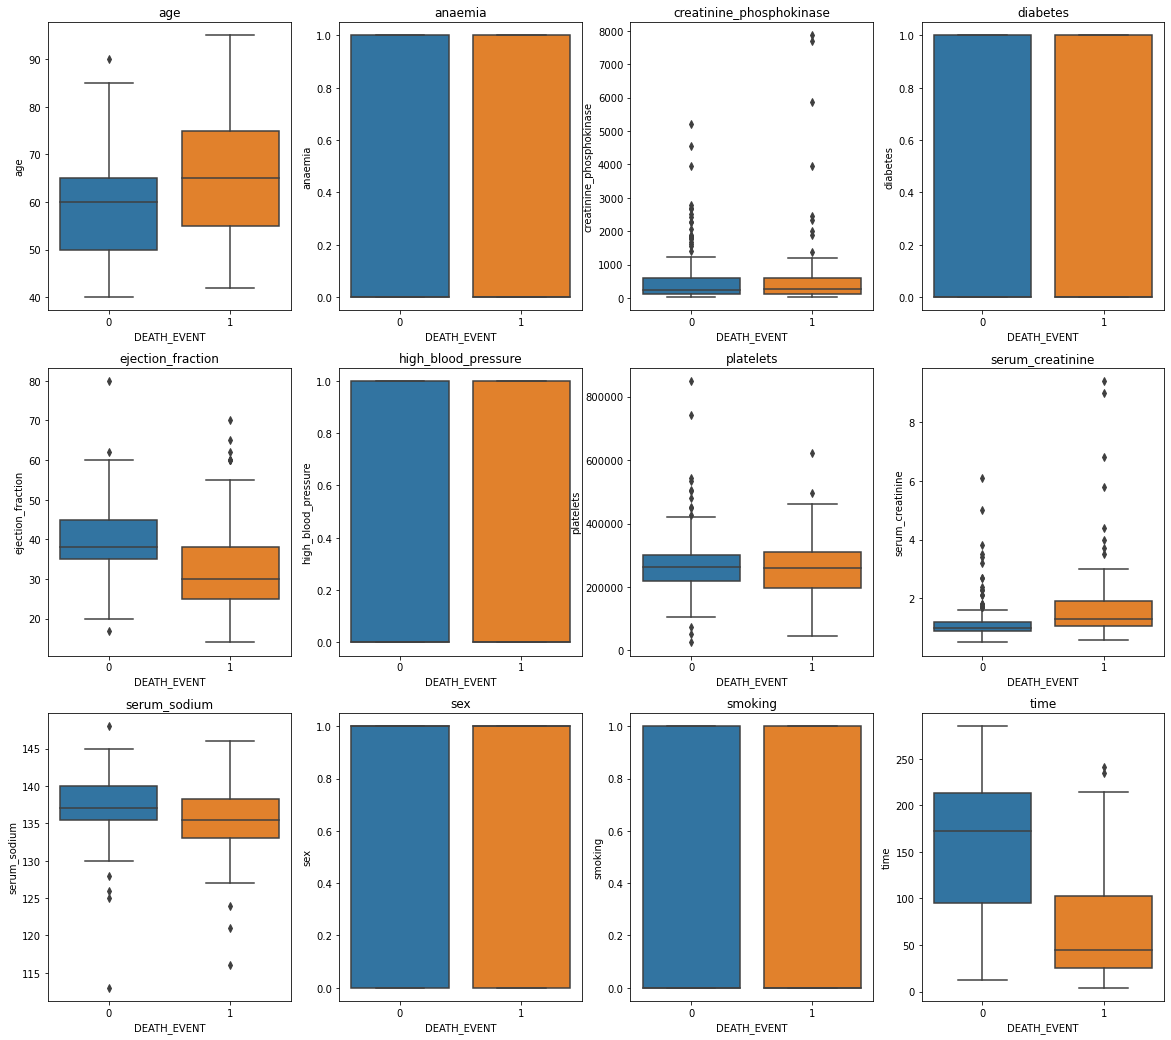

In [8]:
#Check all the numerical data
plt.figure(figsize=(20,18))
plt.subplots_adjust()
i = 1

for col in heartFailure.columns:
    if (heartFailure[col].dtypes == np.float64 or heartFailure[col].dtypes == np.int64) and col !='DEATH_EVENT':
            plt.subplot(3,4,i)
            sns.boxplot(x='DEATH_EVENT',y=col,data=heartFailure)
            i = i+1
            plt.title(col) 

plt.show()

In [9]:
print("Number of rows with creatinine_phosphokinase > 3000: ", np.sum(heartFailure['creatinine_phosphokinase']>3000))
print("Number of rows with platelets > 600000: ", np.sum(heartFailure['platelets']>600000))
print("Number of rows with serum_creatinine > 5: ", np.sum(heartFailure['serum_creatinine']>5))
print("Number of rows with serum_sodium < 120: ", np.sum(heartFailure['serum_sodium']<120))

Number of rows with creatinine_phosphokinase > 3000:  7
Number of rows with platelets > 600000:  3
Number of rows with serum_creatinine > 5:  5
Number of rows with serum_sodium < 120:  2


In [10]:
# removing outliers
heartFailure = heartFailure.loc[(heartFailure['creatinine_phosphokinase']<3000) & (heartFailure['platelets']<600000) &
                                    (heartFailure['serum_creatinine']<5) & (heartFailure['serum_sodium']>120)]

In [11]:
heartFailure.shape

(282, 13)

## 2. Data Exploration

In [12]:
patientDead=heartFailure[heartFailure['DEATH_EVENT']==1]

In [13]:
patientAlive=heartFailure[heartFailure['DEATH_EVENT']==0]

### 2.1 Exploration of Each Column

#### 2.1.1 Exploration of 'age' Feature

In [14]:
heartFailure.groupby('DEATH_EVENT')[['age']].describe()

age                                                    
             count       mean        std   min   25%   50%   75%   max
DEATH_EVENT                                                           
0            195.0  58.864959  10.555504  40.0  50.0  60.0  65.0  90.0
1             87.0  65.363989  13.300310  42.0  56.0  65.0  75.0  95.0

In [15]:
age_group_alive = pd.cut(patientAlive['age'], bins=[0, 40, 50, 60, 70, 80, 90,100])
age_group_dead = pd.cut(patientDead['age'], bins=[0, 40, 50, 60, 70, 80, 90,100])

In [16]:
counts_alive= age_group_alive.value_counts()
counts_dead = age_group_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
age_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive,
              'Total patient':counts_total, 'Death Percent in Same Age Group': percent.map(fmt)})

Text(0, 0.5, 'Numbers')

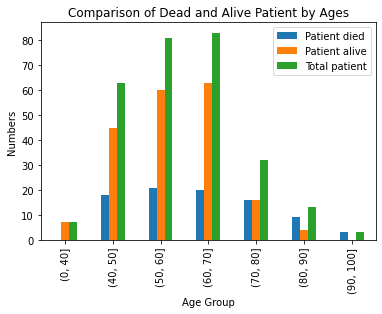

In [17]:
age_patient.plot(kind="bar")
plt.title("Comparison of Dead and Alive Patient by Ages")
plt.xlabel("Age Group")
plt.ylabel("Numbers")

#### 2.1.2  Exploration of 'anemia' feature

In [18]:
heartFailure['anaemia'].value_counts()

0    159
1    123
Name: anaemia, dtype: int64

<AxesSubplot:title={'center':'Death Percentages of Anaemia Positive Patients'}, ylabel='anaemia'>

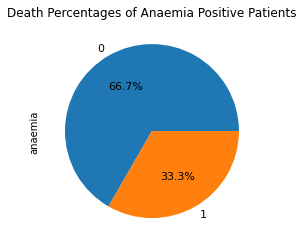

In [19]:
anaemia=heartFailure['anaemia'].groupby(heartFailure['DEATH_EVENT']).sum()
anaemia.plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="Death Percentages of Anaemia Positive Patients" )

#### 2.1.3 Exploration on 'time' feature

In [20]:
time_span_alive = pd.cut(patientAlive['time'], bins=[0, 50, 100, 150, 200, 250, 300])
time_span_dead = pd.cut(patientDead['time'], bins=[0, 50, 100, 150, 200, 250, 300])

In [21]:
counts_alive= time_span_alive.value_counts()
counts_dead = time_span_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
time_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive,
              'Total patient':counts_total, 'Death % in Same follow-up Time Group': percent.map(fmt)})
time_patient

,Patient died,Patient alive,Total patient,Death % in Same follow-up Time Group
"(0, 50]",45,6,51,88.2%
"(50, 100]",19,47,66,28.8%
"(100, 150]",9,43,52,17.3%
"(150, 200]",10,28,38,26.3%
"(200, 250]",4,61,65,6.2%
"(250, 300]",0,10,10,0.0%


#### 2.1.4 Exploration on 'serum_creatinine' feature

Text(0, 0.5, 'Level of Serium Creatinine')

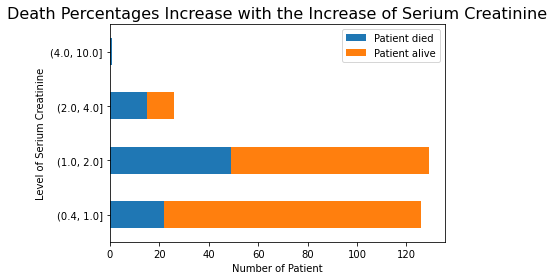

In [22]:
serum_alive = pd.cut(patientAlive['serum_creatinine'], bins=[0.4, 1, 2, 4, 10])
serum_dead = pd.cut(patientDead['serum_creatinine'], bins=[0.4, 1, 2, 4, 10])
counts_alive= serum_alive.value_counts()
counts_dead = serum_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
serium_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive})
serium_patient.plot(kind="barh",stacked=True)
plt.title("Death Percentages Increase with the Increase of Serium Creatinine", fontsize=16)
plt.xlabel("Number of Patient")
plt.ylabel("Level of Serium Creatinine")

#### 2.1.5 Exploration on 'sex' feature

In [23]:
heartFailure.sex.value_counts()

1    183
0     99
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Are the Maximum Heart Patient Male?'}, ylabel='sex'>

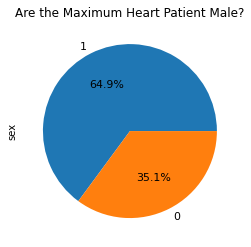

In [24]:
heartFailure.sex.value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="Are the Maximum Heart Patient Male?" )

#### 2.1.6 Exploration on 'smoking' feature

In [25]:
heartFailure['smoking'].value_counts()

0    194
1     88
Name: smoking, dtype: int64

<AxesSubplot:title={'center':'Are the Maximum Smokers Among Heart Patient Male?'}, ylabel='smoking'>

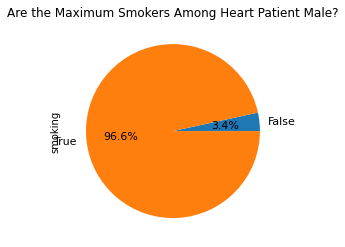

In [26]:
patient_smoking=heartFailure['smoking'].groupby(heartFailure['sex']==1).sum()
patient_smoking.plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="Are the Maximum Smokers Among Heart Patient Male?" )

#### 2.1.7 Exploration on 'serum_sodium' feature

Text(0, 0.5, 'Numbers')

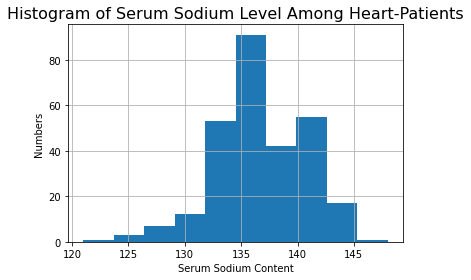

In [27]:
heartFailure['serum_sodium'].plot(kind="hist", grid ="True")
plt.title("Histogram of Serum Sodium Level Among Heart-Patients", fontsize=16)
plt.xlabel("Serum Sodium Content")
plt.ylabel("Numbers")

#### 2.1.8 Exploration on 'diabetes' feature

In [28]:
heartFailure['diabetes'].value_counts()

0    164
1    118
Name: diabetes, dtype: int64

<AxesSubplot:title={'center':'Do Maximum Diabetes Patient Die in case of Heart Failure?'}, ylabel='diabetes'>

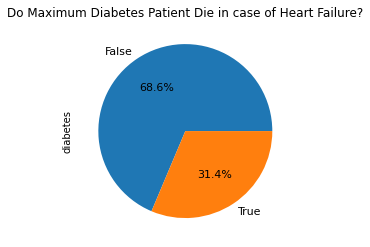

In [29]:
patient_dbts=heartFailure['diabetes'].groupby(heartFailure['DEATH_EVENT']==1).sum()
patient_dbts.plot(kind='pie',autopct='%1.1f%%', fontsize=11,title="Do Maximum Diabetes Patient Die in case of Heart Failure?" )

#### 2.1.9 Exploration on 'ejection_fraction' feature

Text(0, 0.5, 'Number of Patient')

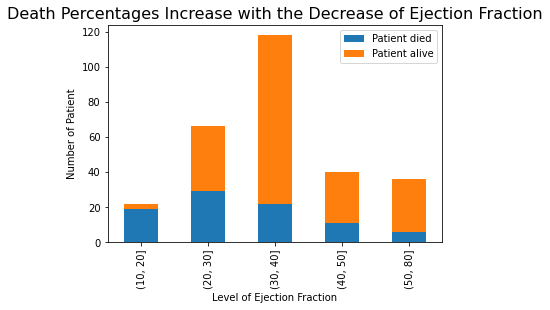

In [30]:
ejection_alive = pd.cut(patientAlive['ejection_fraction'], bins=[10, 20, 30, 40,50,80])
ejection_dead = pd.cut(patientDead['ejection_fraction'], bins=[10, 20, 30, 40,50,80])
counts_alive= ejection_alive.value_counts()
counts_dead = ejection_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
serium_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive})
serium_patient.plot(kind="bar",stacked=True)
plt.title("Death Percentages Increase with the Decrease of Ejection Fraction", fontsize=16)
plt.xlabel("Level of Ejection Fraction")
plt.ylabel("Number of Patient")

#### 2.1.10 Exploration on 'platelets' feature

Text(0, 0.5, 'Numbers')

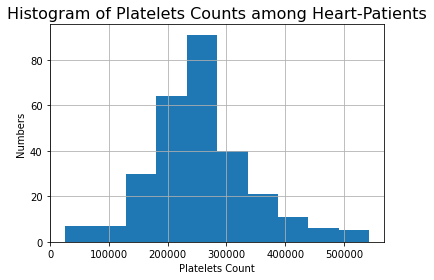

In [31]:
heartFailure['platelets'].plot(kind="hist", grid ="True")
plt.title("Histogram of Platelets Counts among Heart-Patients", fontsize=16)
plt.xlabel("Platelets Count")
plt.ylabel("Numbers")

### 2.1 Relationships Between All Pair of Attributes

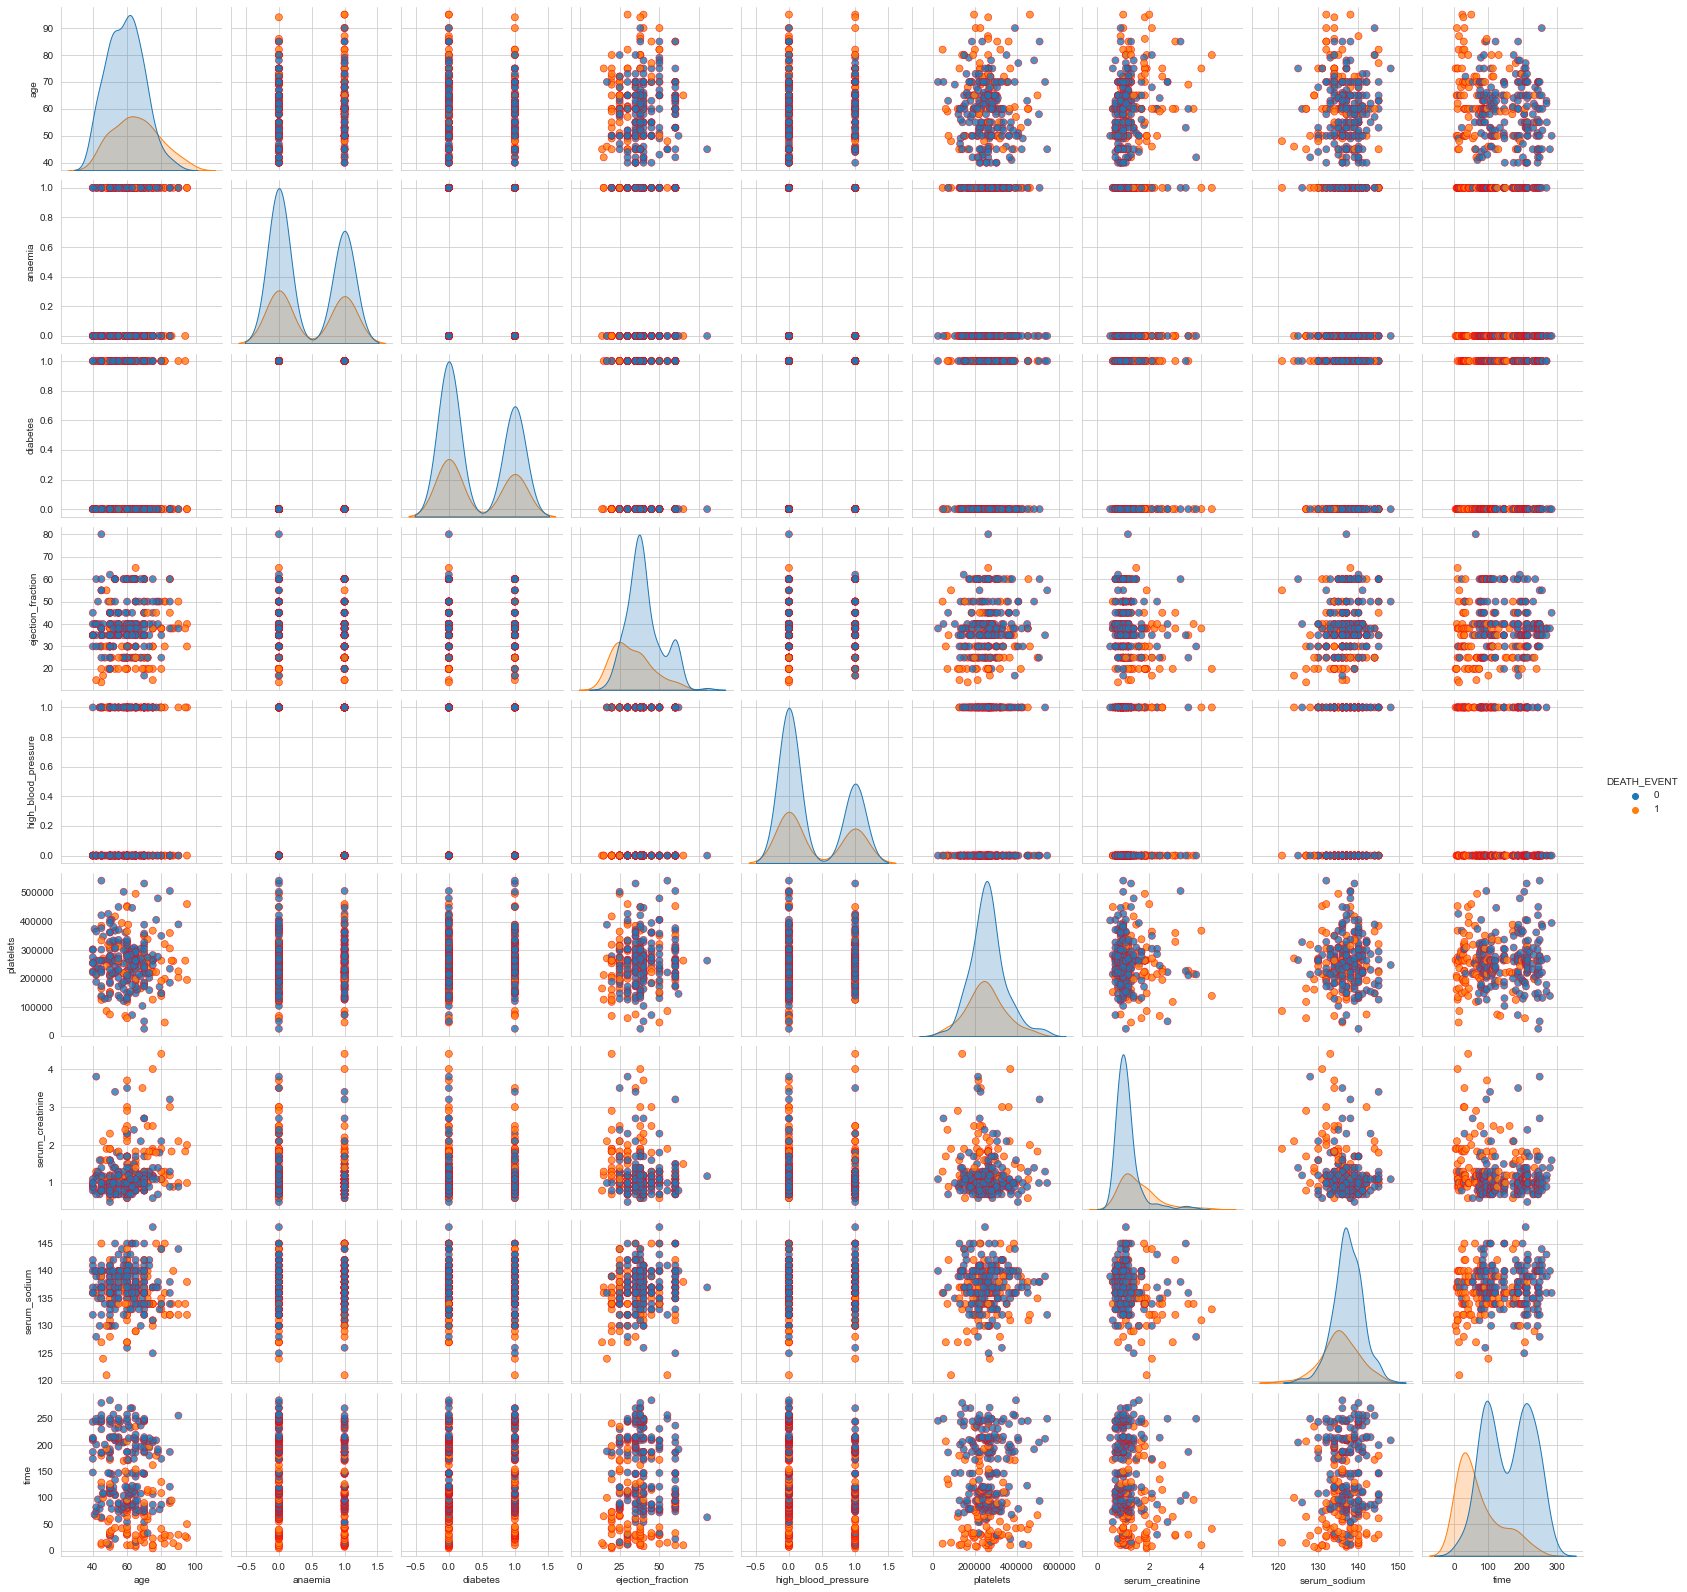

In [32]:

sns.set_style("whitegrid")
sns.pairplot(heartFailure[['age', 'anaemia', 'diabetes',
                           'ejection_fraction', 'high_blood_pressure','platelets',
                           'serum_creatinine','DEATH_EVENT','serum_sodium', 'time',]],
             hue = 'DEATH_EVENT', plot_kws={'alpha':.8,'s':50,'edgecolor':'r'}, height=2.5)


### Co-relation among features

In [33]:
cor = heartFailure.corr()

<AxesSubplot:>

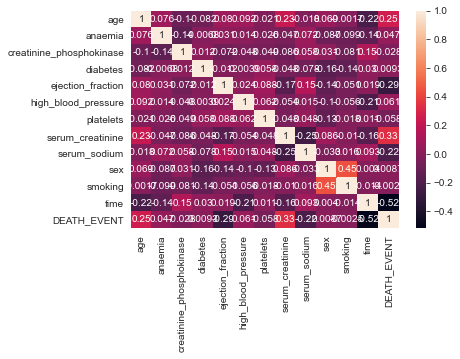

In [34]:
sns.heatmap(cor, annot=True)

## Feature Selection